# What is Singular Value Thresholding (SVT)?

Published: November 28, 2019

Download: This Jupyter notebook is at our GitHub repository. If you want to evaluate the code, please download the notebook from the repository of [**tensor-learning**](https://github.com/xinychen/tensor-learning).

https://github.com/xinychen/tensor-learning

## 1 Matrix Completion & SVT

In [20]:
import numpy as np

def svt(mat, tau):
    u, s, v = np.linalg.svd(mat, full_matrices = 0)
    vec = s - tau
    vec[vec < 0] = 0
    return u @ np.diag(vec) @ v

def LRMC(sparse_mat, dense_mat, rho, maxiter):
    
    pos_train = np.where(sparse_mat != 0)
    pos_test = np.where((sparse_mat == 0) & (dense_mat != 0))
    
    X = sparse_mat.copy()
    Z = sparse_mat.copy()
    T = sparse_mat.copy()
    rse = np.zeros(maxiter)
    
    for it in range(maxiter):
        Z = svt(X + T / rho, 1 / rho)
        X = Z - T / rho
        X[pos_train] = sparse_mat[pos_train]
        T = T - rho * (Z - X)
        rse[it] = (np.linalg.norm(X[pos_test] - dense_mat[pos_test], 2) 
                   / np.linalg.norm(dense_mat[pos_test], 2))
    return X, rse

In [21]:
import imageio

name0 = ["lena"]
name = ["lena_mar"]
image = imageio.v2.imread('lena.png'.format(name0[0]))
sparse_image = imageio.v2.imread('lena.png'.format(name[0]))

# 计算矩阵中元素的总数  
total_elements = sparse_image.size  
# 计算要将多少个元素设置为0  
half_elements = total_elements //2   
# 生成一个随机的索引数组，这些索引将被设置为0  
indices_to_zero = np.random.choice(range(total_elements), half_elements, replace=False)  
# 将这些索引转换为矩阵的行列索引  
rows, cols = np.unravel_index(indices_to_zero, sparse_image.shape)  
# 在随机选择的索引位置将元素设置为0  
sparse_image[rows, cols] = 0  

sparse_mat = sparse_image
dense_mat = image
print(sparse_mat.shape)
print(dense_mat.shape)
print(dense_mat[3,5])

(512, 512)
(512, 512)
136


In [22]:
# 定义计算 PSNR 函数
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2) # 计算均方误差
    if mse == 0: # 如果两幅图像完全相同，返回无穷大
        return np.inf
    else: # 否则，根据公式计算 PSNR
        return 20 * np.log10(255 / np.sqrt(mse))

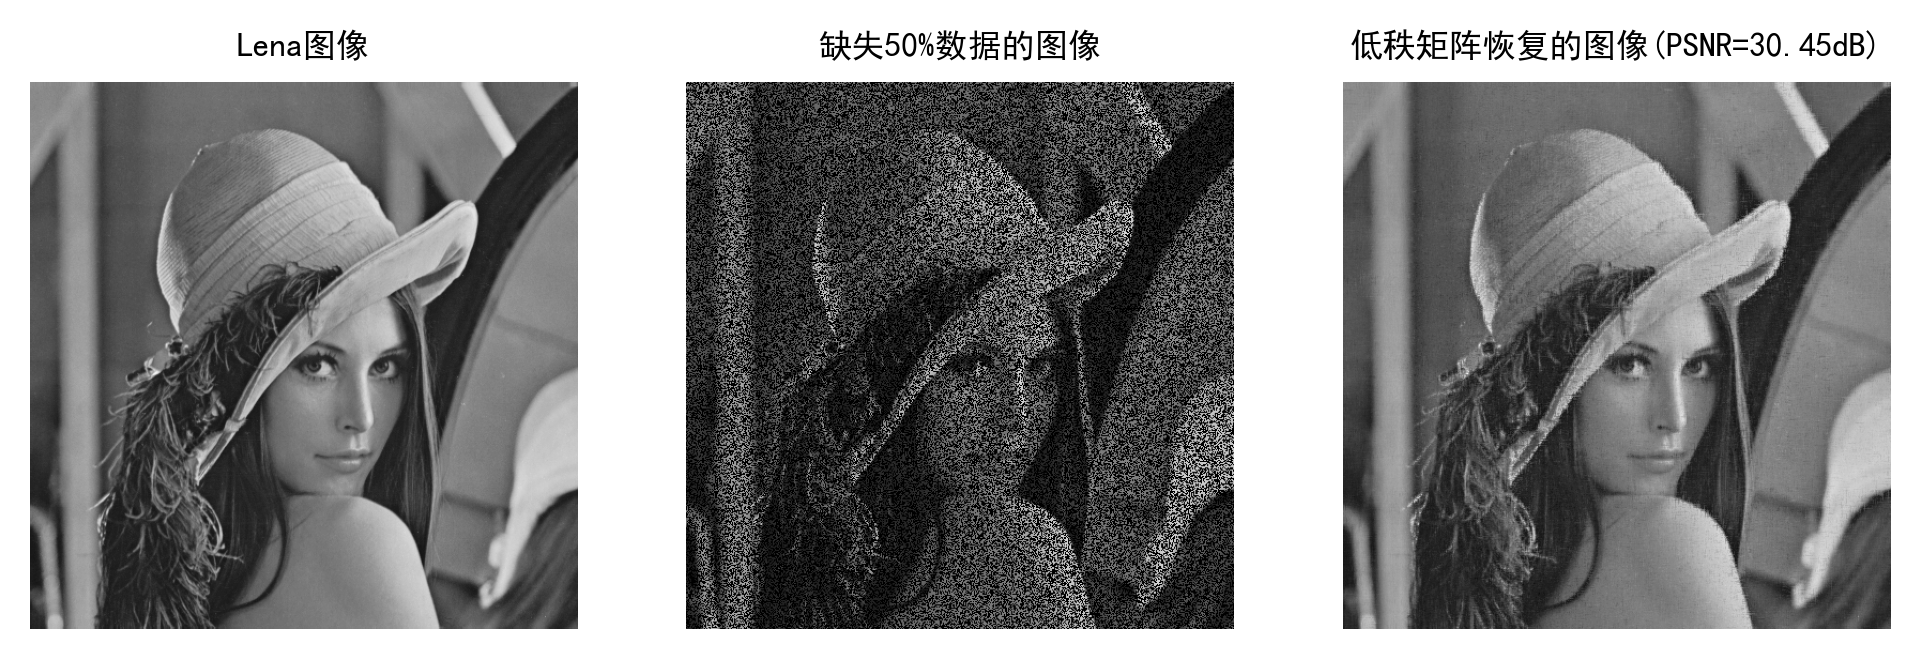

51.41276168823242
58.56496857899045
Relative Squared Error (RSE) is 0.0934536.


In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 300

plt.subplots(1, 3, figsize=(8, 8))
plt.subplot(1, 3, 1)
plt.imshow(dense_mat,cmap='gray', vmin=0, vmax=255)
plt.title('Lena图像',fontsize=8)
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(sparse_mat,cmap='gray', vmin=0, vmax=255)
psnr_incomplete = psnr(dense_mat, sparse_mat) 
plt.title(f'缺失50%数据的图像',fontsize=8) # 设置子图标题，保留两位小数
plt.axis('off')

plt.subplot(1, 3, 3)
rho = 0.005
maxiter = 50
mat_hat, rse_svt = LRMC(sparse_mat, dense_mat, rho, maxiter)
psnr_recovered = psnr(dense_mat, mat_hat) 
plt.title(f'低秩矩阵恢复的图像(PSNR={psnr_recovered:.2f}dB)',fontsize=8) # 设置子图标题，保留两位小数
plt.imshow(mat_hat,cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.savefig('Lena_Lowrank.png')
plt.show()


print(np.mean((dense_mat-sparse_mat) ** 2))
print(np.mean((dense_mat -mat_hat) ** 2))

print('Relative Squared Error (RSE) is {:.6}.'.format(rse_svt[-1]))

Text(0.5, 1.0, 'Matrix completion using SVT.')

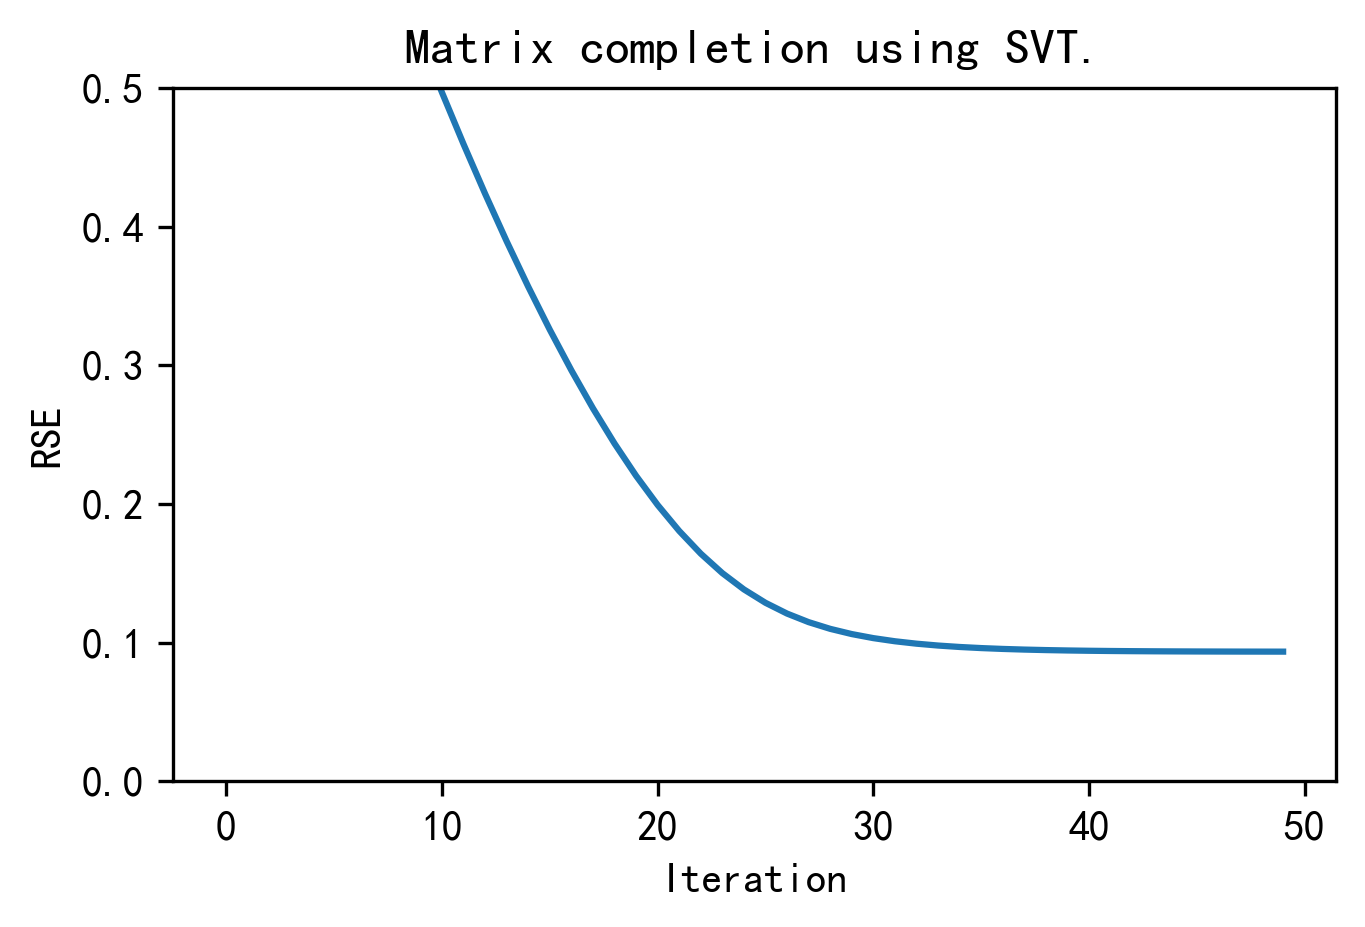

In [24]:
fig = plt.figure(figsize=(5, 3))
ax = plt.subplot(111)
plt.plot(rse_svt)
ax.set_ylim([0, 0.5])
plt.xlabel("Iteration")
plt.ylabel("RSE")
plt.title("Matrix completion using SVT.")